# Analyzing a decade of NHL Hockey (2010-2019)

In the last decade a lot has changed in hockey. The game has changed significantly. Not only players are stronger now but the rules have made the game different than it used to be a decade ago.

## Questions to be answered

These are the questions I am going to answer on this notebook:

1. What are the league's best  goalies?
1. What are the league's best players?
1. What are the best scorer players per team?
1. What are the players that have most penalty minutes per team
1. What is the most prolific country producing NHL players?

## Acknowledgements

I cannot thank enough Jeremy Howard from [fast.ai](https://www.fast.ai/) for his incredible tools and tutorials. I borrowed a lot form his libraries.

The Data set was obtained from Kaggle's user [Martin Ellis](https://www.kaggle.com/martinellis). Thanks a ton Martin!! It is super hard to find such quality data for the NHL.



## Loading required libraries

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import squarify
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Set the precision to 2 decimals
pd.set_option("display.precision", 2)

## Load data files in pandas

I add this PATH variable so I don't have to type it every time to load data into pandas.

In [9]:
PATH = './data/'

Loading the data I am interested

In [11]:
team_info = pd.read_csv(f'{PATH}team_info.csv', low_memory=False)
player_info = pd.read_csv(f'{PATH}player_info.csv', low_memory=False, parse_dates=["birthDate"])
game_skater_stats = pd.read_csv(f'{PATH}game_skater_stats.csv', low_memory=False)
game_goalie_stats = pd.read_csv(f'{PATH}game_goalie_stats.csv', low_memory=False)
game_team_stats = pd.read_csv(f'{PATH}game_teams_stats.csv', low_memory=False)
game = pd.read_csv(f'{PATH}game.csv', low_memory=False, parse_dates=["date_time_GMT"])

This function is borrowed from fast.ai. It lists all the data so we can see it completely in one shot (eliminating the $\dots$ dots) in Jupyter's output.

In [12]:
def display_all(df):
    '''
    INPUT - data frame - pandas dataframe with the data to display
    OUTPUT - 
            display the dataframe with 1,000 rows and columns setting
    '''
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [13]:
def display_bar_plot(df, sort_column, x_col, y_col, n=10):
    '''
    INPUT - 
        df - dataframe to plot
        sort_column - column values we want to sort the data 
        x_col - column for x axis
        y_col - column for y axis
        n - top n rows to plot
    OUTPUT - 
        display the dataframe's bar plot
    '''
    x = df.sort_values(sort_column, ascending=False).head(n)[x_col]
    y = df.sort_values(sort_column, ascending=False).head(n)[y_col]
    plt.figure(figsize=(16,6))
    sns.set_color_codes("dark")
    ax = sns.barplot(x=x, y=y, color='steelblue', alpha=0.6)
    ax.grid(False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [14]:
def display_hbar_plot(df, x_col, y_col, hue, color='steelblue', palette=None):
    '''
    INPUT - 
        df - dataframe to plot
        x_col - column for x axis
        y_col - column for y axis
        hue - what column to use to change color
        color - the color we want the graph to use
        palette - the palette we want to use in case of multi variable histogram
    OUTPUT - 
        display the dataframe's horizontal bar plot
    '''
    sns.set(style="whitegrid")
    sns.barplot(x=x_col, y=y_col, hue=hue, data=df, color=color, palette=palette, dodge=False, alpha=0.6);
    plt.xlabel(x_col)
    plt.ylabel(y_col)

## Look at the data

In [15]:
display_all(team_info.tail().T)

,28,29,30,31,32
team_id,22,54,12,53,11
franchiseId,25,38,26,28,35
shortName,Edmonton,Vegas,Carolina,Arizona,Atlanta
teamName,Oilers,Golden Knights,Hurricanes,Coyotes,Thrashers
abbreviation,EDM,VGK,CAR,ARI,ATL
link,/api/v1/teams/22,/api/v1/teams/54,/api/v1/teams/12,/api/v1/teams/53,/api/v1/teams/11


I am going to remove all columns I really don't need for my analysis like *franchiseId* and *link* from the data frame.

In [16]:
team_info.drop(columns=['franchiseId', 'link'], inplace=True)

In [17]:
display_all(player_info.tail().T)

,3920,3921,3922,3923,3924
player_id,8479374,8479403,8480970,8477574,8477352
firstName,Adam,Tyler,Marcus,Parker,Ryan
lastName,Mascherin,Parsons,Hogstrom,Milner,Fitzgerald
nationality,CAN,USA,SWE,USA,USA
birthCity,Maple,Mt. Clemas,Sveg,Pittsburgh,Boca Raton
primaryPosition,LW,G,D,G,C
birthDate,1998-06-06 01:00:00,1997-09-18 01:00:00,1989-03-20 00:00:00,1990-09-06 01:00:00,1994-10-19 01:00:00
birthStateProvince,ON,MI,NaN,PA,FL
height,"5' 10""","6' 1""","6' 4""","6' 1""","5' 9"""
height_cm,177.8,185.42,193.04,185.42,175.26


Again I drop the columns I don't need

In [19]:
player_info.drop(columns=['birthCity'], inplace=True)

In [20]:
display_all(game_skater_stats.tail().T)

,945825,945826,945827,945828,945829
game_id,2.02e+09,2.02e+09,2.02e+09,2.02e+09,2.02e+09
player_id,8.48e+06,8.48e+06,8.48e+06,8.48e+06,8.48e+06
team_id,6.00e+00,6.00e+00,6.00e+00,6.00e+00,6.00e+00
timeOnIce,5.01e+02,1.06e+03,9.13e+02,1.01e+03,9.09e+02
assists,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
goals,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
shots,1.00e+00,2.00e+00,2.00e+00,1.00e+00,2.00e+00
hits,2.00e+00,0.00e+00,3.00e+00,1.00e+00,0.00e+00
powerPlayGoals,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
powerPlayAssists,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00


In [21]:
display_all(game_goalie_stats.tail().T)

,56651,56652,56653,56654,56655
game_id,2018030416,2018030417,2018030417,2018030417,2018030417
player_id,8476412,8476412,8471695,8476412,8471695
team_id,19,19,6,19,6
timeOnIce,3487,3600,3394,3600,3394
assists,0,0,0,0,0
goals,0,0,0,0,0
pim,0,0,0,0,0
shots,31,33,20,33,20
saves,27,32,16,32,16
powerPlaySaves,3,3,0,3,0


In [22]:
display_all(game_team_stats.tail().T)

,52605,52606,52607,52608,52609
game_id,2018030416,2018030417,2018030417,2018030417,2018030417
team_id,19,19,6,19,6
HoA,home,away,home,away,home
won,False,True,False,True,False
settled_in,REG,REG,REG,REG,REG
head_coach,Craig Berube,Craig Berube,Bruce Cassidy,Craig Berube,Bruce Cassidy
goals,1.0,4.0,1.0,4.0,1.0
shots,29.0,20.0,33.0,20.0,33.0
hits,29.0,36.0,28.0,36.0,28.0
pim,20.0,2.0,0.0,2.0,0.0


In [23]:
display_all(game.tail().T)

,26300,26301,26302,26303,26304
game_id,2018030415,2018030416,2018030416,2018030417,2018030417
season,20182019,20182019,20182019,20182019,20182019
type,P,P,P,P,P
date_time_GMT,2019-06-07 00:00:00+00:00,2019-06-10 00:00:00+00:00,2019-06-10 00:00:00+00:00,2019-06-13 00:00:00+00:00,2019-06-13 00:00:00+00:00
away_team_id,19,6,6,19,19
home_team_id,6,19,19,6,6
away_goals,2,5,5,4,4
home_goals,1,1,1,1,1
outcome,away win REG,away win REG,away win REG,away win REG,away win REG
home_rink_side_start,left,left,left,left,left


In [24]:
game.drop(columns=['venue_link'], inplace=True)

### Describe the dataframes

I describe the dataframes to get a sense of the information contained inside.

In [25]:
display_all(team_info.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
team_id,33.0,NaN,NaN,NaN,18.91,13.79,1.0,9.0,17.0,25.0,54.0
shortName,33,33,New Jersey,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teamName,33,32,Coyotes,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abbreviation,33,33,NJD,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
display_all(player_info.describe(include='all', datetime_is_numeric=True).T)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
player_id,3925.0,NaN,NaN,NaN,8470209.48,8444894.0,8466403.0,8471490.0,8476419.0,8481813.0,8016.82
firstName,3925,928,Mike,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lastName,3925,3153,Smith,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,3917,28,CAN,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primaryPosition,3925,5,D,1208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthDate,3925,NaN,NaN,NaN,1984-10-06 15:06:46.318471296,1960-10-24 00:00:00,1978-02-13 00:00:00,1985-05-22 01:00:00,1992-02-02 00:00:00,2001-09-11 01:00:00,NaN
birthStateProvince,2802,50,ON,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,3922,18,"6' 1""",760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height_cm,3922.0,NaN,NaN,NaN,185.72,162.56,182.88,185.42,187.96,205.74,5.37
weight,3922.0,NaN,NaN,NaN,200.59,140.0,190.0,200.0,210.0,265.0,15.89


In [27]:
display_all(game_skater_stats.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
game_id,945830.0,2.01e+09,6.07e+06,2.00e+09,2.01e+09,2.01e+09,2.02e+09,2.02e+09
player_id,945830.0,8.47e+06,7.30e+03,8.44e+06,8.47e+06,8.47e+06,8.48e+06,8.48e+06
team_id,945830.0,1.69e+01,1.11e+01,1.00e+00,8.00e+00,1.60e+01,2.40e+01,9.00e+01
timeOnIce,945830.0,9.89e+02,3.11e+02,0.00e+00,7.87e+02,9.99e+02,1.20e+03,4.32e+03
assists,945830.0,2.63e-01,5.34e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,5.00e+00
goals,945830.0,1.55e-01,4.09e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,5.00e+00
shots,945830.0,1.66e+00,1.55e+00,0.00e+00,0.00e+00,1.00e+00,2.00e+00,1.60e+01
hits,547723.0,1.30e+00,1.46e+00,0.00e+00,0.00e+00,1.00e+00,2.00e+00,1.50e+01
powerPlayGoals,945830.0,3.71e-02,1.97e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,4.00e+00
powerPlayAssists,945830.0,7.05e-02,2.77e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,5.00e+00


In [28]:
display_all(game_goalie_stats.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
game_id,56656.0,NaN,NaN,NaN,2010747819.29,6068775.17,2000020001.0,2006020416.75,2011020722.5,2016021213.0,2019040653.0
player_id,56656.0,NaN,NaN,NaN,8468184.45,7417.59,8445275.0,8462055.0,8470320.0,8473607.0,8480925.0
team_id,56656.0,NaN,NaN,NaN,16.9,11.24,1.0,8.0,16.0,24.0,90.0
timeOnIce,56656.0,NaN,NaN,NaN,3369.15,734.19,0.0,3525.0,3598.0,3600.0,9027.0
assists,56656.0,NaN,NaN,NaN,0.02,0.15,0.0,0.0,0.0,0.0,2.0
goals,56656.0,NaN,NaN,NaN,0.0,0.01,0.0,0.0,0.0,0.0,1.0
pim,56656.0,NaN,NaN,NaN,0.09,0.61,0.0,0.0,0.0,0.0,29.0
shots,56656.0,NaN,NaN,NaN,27.68,8.83,0.0,23.0,28.0,33.0,88.0
saves,56656.0,NaN,NaN,NaN,25.2,8.65,0.0,20.0,26.0,31.0,85.0
powerPlaySaves,56656.0,NaN,NaN,NaN,4.08,3.2,0.0,2.0,4.0,6.0,25.0


In [29]:
display_all(game_team_stats.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
game_id,52610.0,NaN,NaN,NaN,2010765072.36,6073510.28,2000020001.0,2006020427.0,2011020764.0,2016030151.0,2019040653.0
team_id,52610.0,NaN,NaN,NaN,16.88,11.2,1.0,8.0,16.0,24.0,90.0
HoA,52610,2,away,26305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
won,52610,2,False,26947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
settled_in,52610,3,REG,40306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
head_coach,52582,146,Barry Trotz,1804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goals,52602.0,NaN,NaN,NaN,2.78,1.66,0.0,2.0,3.0,4.0,12.0
shots,52602.0,NaN,NaN,NaN,29.93,6.9,0.0,25.0,30.0,34.0,88.0
hits,47682.0,NaN,NaN,NaN,21.13,9.24,0.0,15.0,20.0,27.0,80.0
pim,52602.0,NaN,NaN,NaN,11.75,9.03,0.0,6.0,10.0,15.0,213.0


In [31]:
display_all(game.describe(include='all', datetime_is_numeric=True).T)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
game_id,26305.0,NaN,NaN,NaN,2010765072.36,2000020001.0,2006020427.0,2011020764.0,2016030151.0,2019040653.0,6073568.01
season,26305.0,NaN,NaN,NaN,20109452.15,20002001.0,20062007.0,20112012.0,20162017.0,20192020.0,60738.49
type,26305,3,R,25171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time_GMT,26305,NaN,NaN,NaN,2011-10-13 19:14:31.180384+00:00,2000-10-04 23:00:00+00:00,2006-12-10 00:00:00+00:00,2012-02-04 01:00:00+00:00,2017-04-18 23:00:00+00:00,2020-09-29 00:00:00+00:00,NaN
away_team_id,26305.0,NaN,NaN,NaN,16.88,1.0,8.0,16.0,24.0,90.0,11.18
home_team_id,26305.0,NaN,NaN,NaN,16.88,1.0,8.0,16.0,24.0,90.0,11.21
away_goals,26305.0,NaN,NaN,NaN,2.69,0.0,1.0,3.0,4.0,11.0,1.62
home_goals,26305.0,NaN,NaN,NaN,2.96,0.0,2.0,3.0,4.0,12.0,1.69
outcome,26305,8,home win REG,11256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_rink_side_start,25109,2,right,13426,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's check the type of each column

I run info() to spot missing data (null values), check what pandas think my data types are and correct them if necesary.

In [33]:
team_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   team_id       33 non-null     int64 
 1   shortName     33 non-null     object
 2   teamName      33 non-null     object
 3   abbreviation  33 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [34]:
player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925 entries, 0 to 3924
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   player_id           3925 non-null   int64         
 1   firstName           3925 non-null   object        
 2   lastName            3925 non-null   object        
 3   nationality         3917 non-null   object        
 4   primaryPosition     3925 non-null   object        
 5   birthDate           3925 non-null   datetime64[ns]
 6   birthStateProvince  2802 non-null   object        
 7   height              3922 non-null   object        
 8   height_cm           3922 non-null   float64       
 9   weight              3922 non-null   float64       
 10  shootsCatches       3908 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 337.4+ KB


In [35]:
game_skater_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945830 entries, 0 to 945829
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   game_id               945830 non-null  int64  
 1   player_id             945830 non-null  int64  
 2   team_id               945830 non-null  int64  
 3   timeOnIce             945830 non-null  int64  
 4   assists               945830 non-null  int64  
 5   goals                 945830 non-null  int64  
 6   shots                 945830 non-null  int64  
 7   hits                  547723 non-null  float64
 8   powerPlayGoals        945830 non-null  int64  
 9   powerPlayAssists      945830 non-null  int64  
 10  penaltyMinutes        945830 non-null  int64  
 11  faceOffWins           945830 non-null  int64  
 12  faceoffTaken          945830 non-null  int64  
 13  takeaways             547723 non-null  float64
 14  giveaways             547723 non-null  float64
 15  

In [36]:
game_goalie_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56656 entries, 0 to 56655
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   game_id                     56656 non-null  int64  
 1   player_id                   56656 non-null  int64  
 2   team_id                     56656 non-null  int64  
 3   timeOnIce                   56656 non-null  int64  
 4   assists                     56656 non-null  int64  
 5   goals                       56656 non-null  int64  
 6   pim                         56656 non-null  int64  
 7   shots                       56656 non-null  int64  
 8   saves                       56656 non-null  int64  
 9   powerPlaySaves              56656 non-null  int64  
 10  shortHandedSaves            56656 non-null  int64  
 11  evenSaves                   56656 non-null  int64  
 12  shortHandedShotsAgainst     56656 non-null  int64  
 13  evenShotsAgainst            566

In [37]:
game_team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    47682 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               47682 non-null  float64
 14  takeaways               47682 non-null

In [38]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   game_id                 26305 non-null  int64              
 1   season                  26305 non-null  int64              
 2   type                    26305 non-null  object             
 3   date_time_GMT           26305 non-null  datetime64[ns, UTC]
 4   away_team_id            26305 non-null  int64              
 5   home_team_id            26305 non-null  int64              
 6   away_goals              26305 non-null  int64              
 7   home_goals              26305 non-null  int64              
 8   outcome                 26305 non-null  object             
 9   home_rink_side_start    25109 non-null  object             
 10  venue                   26305 non-null  object             
 11  venue_time_zone_id      26305 non-null  o

### Let's address some null values

Players file has some missing data I need to investigate.

In [39]:
player_info[player_info['nationality'].isnull()]

,player_id,firstName,lastName,nationality,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
1300,8479138,Scott,Foster,NaN,G,1982-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN
1342,8480718,Ben,Wexler,NaN,G,1994-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN
3512,8480373,Josef,Korenar,NaN,G,1998-01-31 00:00:00,NaN,"6' 1""",185.42,185.0,L
3541,8480356,Kyle,Keyser,NaN,G,1999-03-08 00:00:00,FL,NaN,NaN,NaN,L
3803,8478975,Mason,Marchment,NaN,LW,1995-06-18 01:00:00,ON,"6' 4""",193.04,220.0,L
3891,8479439,Jacob,MacDonald,NaN,D,1993-02-26 00:00:00,OR,"6' 0""",182.88,204.0,L
3914,8480363,Kaden,Fulcher,NaN,G,1998-09-23 01:00:00,ON,"6' 2""",187.96,182.0,NaN
3915,8480779,Niclas,Westerholm,NaN,G,1997-08-13 01:00:00,NaN,"6' 3""",190.50,198.0,NaN


A quick google search and I found all these players are mainly prospects so no surprise there is missing infomation about them. 

Scott Foster was Blackhawks contracted emergency goalie. He never suited up for a game during his tenure with the team. Until that luckly night during the 2017-2018 season when all Blackhawks' goalies where injured and he was called out to dress up. He played the "longest 14 minutes of Hockey" of his live as he described it himself in one of the countless interviews he did afterwards.

I manually fixed these are this are not too many.

In [40]:
# Josef Korenar
player_info.at[1445, 'nationality'] = 'CZE'

# Kyle Keyser
player_info.at[1548, 'nationality'] = 'USA'

# Scott Foster
player_info.at[2009, 'nationality'] = 'CAN'

# Ben Wexler
player_info.at[2026, 'nationality'] = 'USA'

# Jacob MacDonald
player_info.at[2079, 'nationality'] = 'USA'

# Landon Bow
player_info.at[2107, 'nationality'] = 'CAN'

# Blake Lizotte
player_info.at[2383, 'nationality'] = 'USA'

# Kaden Fulcher
player_info.at[2384, 'nationality'] = 'CAN'

# Niclas Westerholm
player_info.at[2386, 'nationality'] = 'FIN'

## Merge data with player's, team's and game's information

Now I have to do some table joints (merge in pandas lingo) so I can have the stats and the player's name in one dataframe. Same with the goalies and team names too.

In [41]:
skater = game_skater_stats.merge(player_info, on='player_id', how='left').merge(team_info, on='team_id', how='left')

In [42]:
goalie = game_goalie_stats.merge(player_info, on='player_id', how='left').merge(team_info, on='team_id', how='left')

### Drop unnecesary columns and concatenate the player's first and last names

I concatenate the player's firs and last name into one column and drop them as I don't need them anymore moving forward.

In [43]:
skater['fullName'] = skater['firstName'].str.cat(skater['lastName'], sep=' ')

In [44]:
goalie['fullName'] = goalie['firstName'].str.cat(goalie['lastName'], sep=' ')

In [45]:
skater.drop(['firstName', 'lastName', 'player_id', 'team_id'], axis=1, inplace=True)

In [46]:
goalie.drop(['firstName', 'lastName', 'player_id', 'team_id'], axis=1, inplace=True)

In [47]:
games = skater.merge(game, on='game_id', how='left')

In [48]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130682 entries, 0 to 1130681
Data columns (total 45 columns):
 #   Column                  Non-Null Count    Dtype              
---  ------                  --------------    -----              
 0   game_id                 1130682 non-null  int64              
 1   timeOnIce               1130682 non-null  int64              
 2   assists                 1130682 non-null  int64              
 3   goals                   1130682 non-null  int64              
 4   shots                   1130682 non-null  int64              
 5   hits                    732575 non-null   float64            
 6   powerPlayGoals          1130682 non-null  int64              
 7   powerPlayAssists        1130682 non-null  int64              
 8   penaltyMinutes          1130682 non-null  int64              
 9   faceOffWins             1130682 non-null  int64              
 10  faceoffTaken            1130682 non-null  int64              
 11  takeaways  

In [49]:
skater.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945830 entries, 0 to 945829
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   game_id               945830 non-null  int64         
 1   timeOnIce             945830 non-null  int64         
 2   assists               945830 non-null  int64         
 3   goals                 945830 non-null  int64         
 4   shots                 945830 non-null  int64         
 5   hits                  547723 non-null  float64       
 6   powerPlayGoals        945830 non-null  int64         
 7   powerPlayAssists      945830 non-null  int64         
 8   penaltyMinutes        945830 non-null  int64         
 9   faceOffWins           945830 non-null  int64         
 10  faceoffTaken          945830 non-null  int64         
 11  takeaways             547723 non-null  float64       
 12  giveaways             547723 non-null  float64       
 13 

In [50]:
goalie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56656 entries, 0 to 56655
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   game_id                     56656 non-null  int64         
 1   timeOnIce                   56656 non-null  int64         
 2   assists                     56656 non-null  int64         
 3   goals                       56656 non-null  int64         
 4   pim                         56656 non-null  int64         
 5   shots                       56656 non-null  int64         
 6   saves                       56656 non-null  int64         
 7   powerPlaySaves              56656 non-null  int64         
 8   shortHandedSaves            56656 non-null  int64         
 9   evenSaves                   56656 non-null  int64         
 10  shortHandedShotsAgainst     56656 non-null  int64         
 11  evenShotsAgainst            56656 non-null  int64     

In [51]:
print("Min season: {}\nMax season: {}".format(str(game['season'].min()), str(game['season'].max())))

Min season: 20002001
Max season: 20192020


In [55]:
# Save data in parquet to avoid performing data cleaning on subsequent articles or work
games.to_parquet(f'{PATH}games.parquet', engine='pyarrow')
skater.to_parquet(f'{PATH}skater.parquet', engine='pyarrow')
goalie.to_parquet(f'{PATH}goalie.parquet', engine='pyarrow')

## Best NHL Hockey players of the decade (2010-2019)

### What are the league's best scorer players?

As we saw before, there are some prospect players that have made it to some matchs. Later on (when I analized goalies) I saw none of the best goalies from the league in the top 10! It ended up being these prospects (like Scott Foster who played 14 minutes and received zero goals, a 100% save percentage!) that have very few minutes but high save percentages.

To take care of this I had some alternatives:

**Eliminate all goalies with 100% save percentage**

This alternative is not fear to seasoned goalies, and players in general. Veteran goalie players enter the rink to replace the starting goalie when have already received 3-4 goals. So they deserve the good save percenatge. 

**Determine a minimum number of seasons to be considered**

Also has some issues as this arises the question of: what does make the minumum number of seasons correct? In despite of this concern I have selected this option. I have chose a minimum of 5 seasons and an average of 81 games per season (41 home ice plus 41 away games).

In [58]:
# Minimum seasons played
min_seasons_played = 5
games_per_season = 81

# Minummum number of games to be considered for the decade best player analysis
min_games = min_seasons_played * games_per_season

In [59]:
# Filter out columns I don't need right now
top_skaters = skater[['game_id','teamName','fullName','primaryPosition', 'nationality','timeOnIce','penaltyMinutes', 'goals']]\
    .groupby(['teamName','fullName', 'primaryPosition', 'nationality'], as_index=False)\
    .agg({'game_id':'count', 'goals':'sum', 'timeOnIce':'mean', 'penaltyMinutes':'sum'})

In [60]:
top_skaters.head()

,teamName,fullName,primaryPosition,nationality,game_id,goals,timeOnIce,penaltyMinutes
0,Avalanche,A.J. Greer,LW,CAN,52,2,440.77,61
1,Avalanche,Aaron MacKenzie,D,CAN,5,0,878.00,0
2,Avalanche,Aaron Miller,D,USA,56,4,1105.46,29
3,Avalanche,Aaron Palushaj,RW,USA,25,2,678.92,8
4,Avalanche,Adam Deadmarsh,RW,USA,39,13,1057.67,59


Renaming columns and doing some calculations.

In [61]:
top_skaters.columns = ['Team Name','Player Name', 'Position', 'Nationality', 'Total Games',
                       'Total Goals','Avg Time On Ice', 'Total Penalty Minutes']

In [62]:
# Let's convert the time on ice from seconds to minutes
top_skaters['Avg Time On Ice'] = top_skaters['Avg Time On Ice'] / 60

In [63]:
# Let's compute the Goals per game (Goals Per Game) to normalize the data
top_skaters['Goals Per Game'] = top_skaters['Total Goals'] / top_skaters['Total Games']

# Let's see also how goals relate to time on ice (toi)
top_skaters['Goals Per TOI'] = top_skaters['Total Goals'] / (top_skaters['Avg Time On Ice'])

# Total penalty minutes per game
top_skaters['Penalty Minutes Per Game'] = top_skaters['Total Penalty Minutes'] / (top_skaters['Total Games'])

# Now we look at the top 10 players appliying the minimum games played in the league
top_skaters[top_skaters['Total Games'] > min_games].sort_values('Goals Per Game', ascending=False).head(10)

,Team Name,Player Name,Position,Nationality,Total Games,Total Goals,Avg Time On Ice,Total Penalty Minutes,Goals Per Game,Goals Per TOI,Penalty Minutes Per Game
1813,Capitals,Alex Ovechkin,LW,RUS,1424,862,20.93,877,0.61,41.19,0.62
4493,Maple Leafs,Auston Matthews,C,USA,457,261,19.26,70,0.57,13.55,0.15
7219,Thrashers,Ilya Kovalchuk,RW,RUS,593,326,21.41,429,0.55,15.23,0.72
4447,Lightning,Steven Stamkos,C,CAN,1018,522,19.16,598,0.51,27.24,0.59
4793,Oilers,Connor McDavid,C,CAN,513,251,21.75,170,0.49,11.54,0.33
1084,Bruins,David Pastrnak,RW,CZE,612,298,17.87,269,0.49,16.67,0.44
2968,Flames,Jarome Iginla,RW,CAN,908,434,21.20,681,0.48,20.47,0.75
4880,Oilers,Leon Draisaitl,C,DEU,595,272,20.43,233,0.46,13.31,0.39
5535,Penguins,Sidney Crosby,C,CAN,1217,552,20.83,769,0.45,26.50,0.63
5386,Penguins,Jake Guentzel,C,USA,416,185,18.60,150,0.44,9.95,0.36


In [64]:
top_skaters = top_skaters[top_skaters['Total Games'] > min_games]

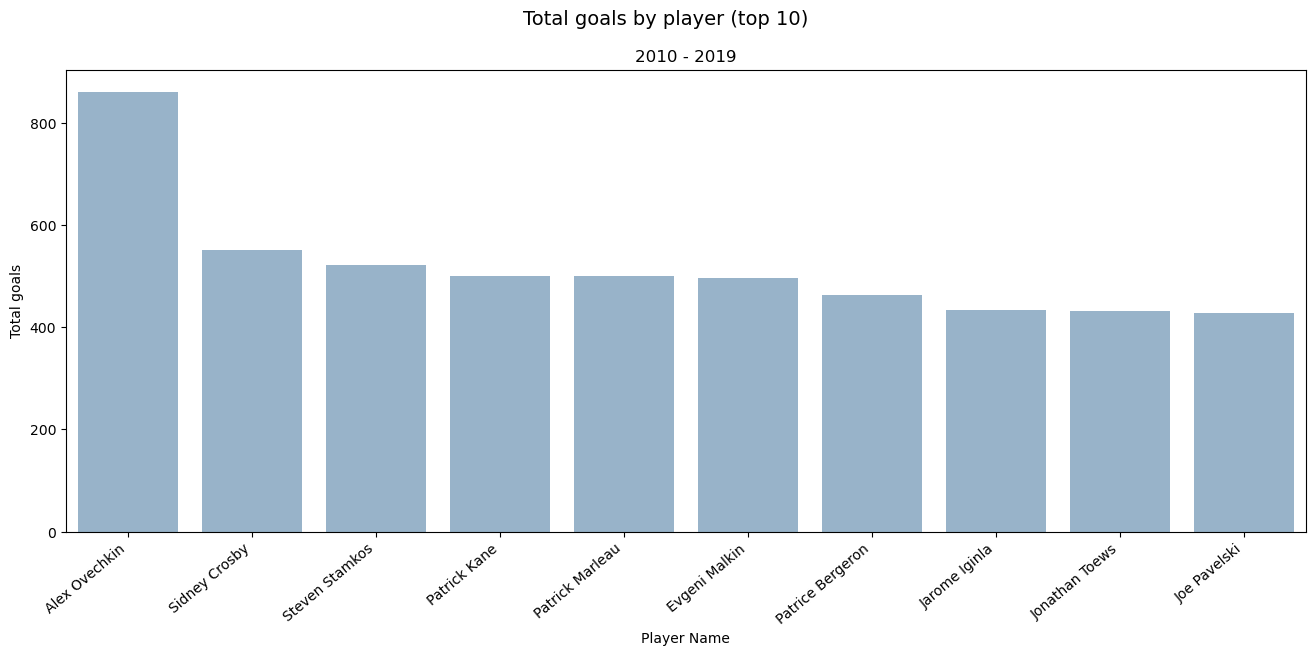

In [65]:
display_bar_plot(top_skaters, 'Total Goals', 'Player Name', 'Total Goals', 10)
plt.xlabel('Player Name')
plt.ylabel('Total goals')
plt.suptitle('Total goals by player (top 10)', fontsize=14)
plt.title('2010 - 2019', fontsize=12)
plt.show()

In [66]:
top_skaters.sort_values('Total Goals', ascending=False)\
    .head(10)[['Team Name','Player Name', 'Position', 'Total Games','Total Goals']]

,Team Name,Player Name,Position,Total Games,Total Goals
1813,Capitals,Alex Ovechkin,LW,1424,862
5535,Penguins,Sidney Crosby,C,1217,552
4447,Lightning,Steven Stamkos,C,1018,522
447,Blackhawks,Patrick Kane,RW,1230,501
6873,Sharks,Patrick Marleau,C,1444,500
5371,Penguins,Evgeni Malkin,C,1141,497
1217,Bruins,Patrice Bergeron,C,1370,463
2968,Flames,Jarome Iginla,RW,908,434
378,Blackhawks,Jonathan Toews,C,1201,432
6806,Sharks,Joe Pavelski,C,1144,429


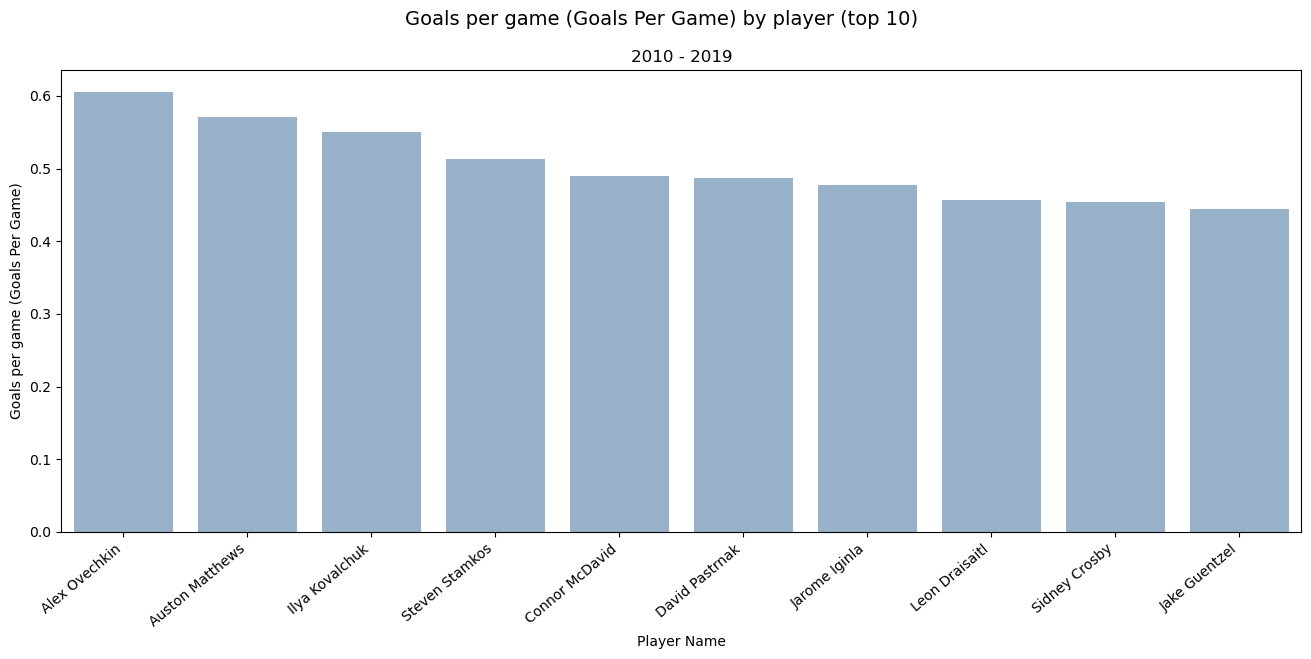

In [67]:
display_bar_plot(top_skaters, 'Goals Per Game', 'Player Name', 'Goals Per Game', 10)
plt.xlabel('Player Name')
plt.ylabel('Goals per game (Goals Per Game)')
plt.suptitle('Goals per game (Goals Per Game) by player (top 10)', fontsize=14)
plt.title('2010 - 2019', fontsize=12)
plt.show()

Not surprisingly the ya re almost all Capitans of their respective teams!

In [68]:
top_skaters.sort_values('Goals Per Game', ascending=False)\
    .head(10)[['Team Name','Player Name', 'Position', 'Total Games','Goals Per Game']]

,Team Name,Player Name,Position,Total Games,Goals Per Game
1813,Capitals,Alex Ovechkin,LW,1424,0.61
4493,Maple Leafs,Auston Matthews,C,457,0.57
7219,Thrashers,Ilya Kovalchuk,RW,593,0.55
4447,Lightning,Steven Stamkos,C,1018,0.51
4793,Oilers,Connor McDavid,C,513,0.49
1084,Bruins,David Pastrnak,RW,612,0.49
2968,Flames,Jarome Iginla,RW,908,0.48
4880,Oilers,Leon Draisaitl,C,595,0.46
5535,Penguins,Sidney Crosby,C,1217,0.45
5386,Penguins,Jake Guentzel,C,416,0.44


Now let's look at the goals per player but normalized by minutes played (Goals Per TOI).

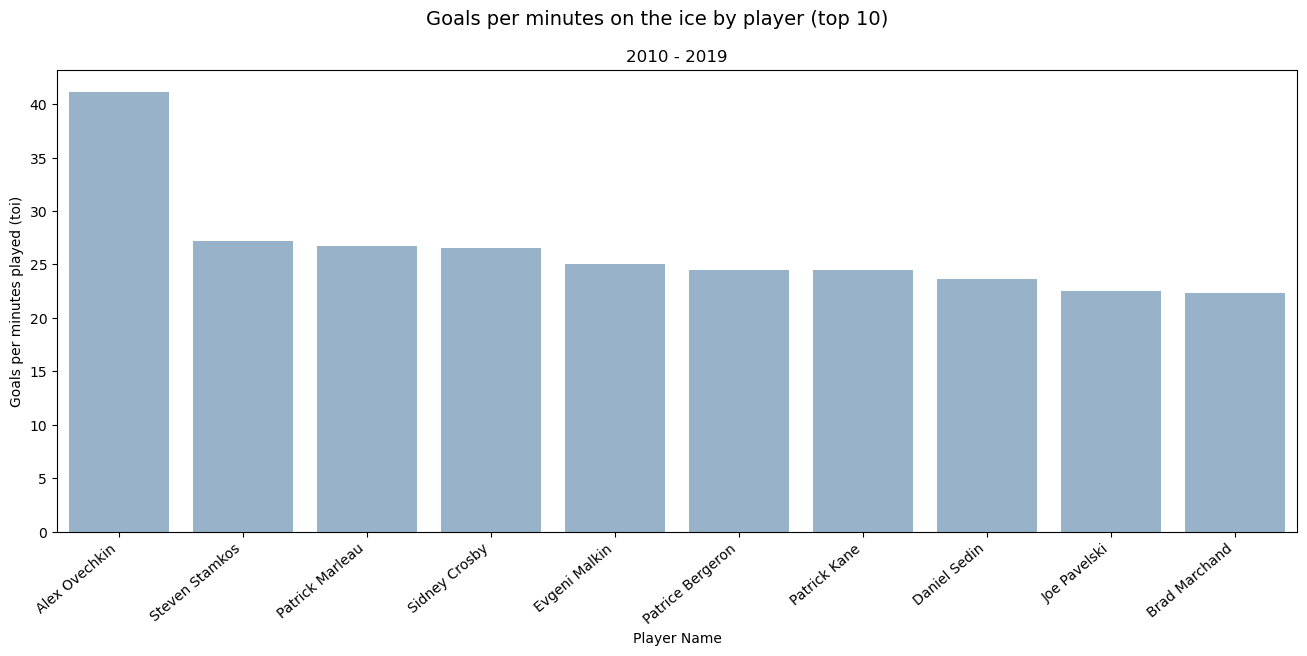

In [69]:
display_bar_plot(top_skaters, 'Goals Per TOI', 'Player Name', 'Goals Per TOI')
plt.xlabel('Player Name')
plt.ylabel('Goals per minutes played (toi)')
plt.suptitle('Goals per minutes on the ice by player (top 10)', fontsize=14)
plt.title('2010 - 2019', fontsize=12)
plt.show()

We see some movement of players on the bottom of the list but Alex Ovechkin stills remain on the first place.

In [70]:
top_skaters.sort_values('Goals Per TOI', ascending=False)\
    .head(10)[['Team Name','Player Name', 'Position', 'Total Games','Goals Per TOI']]

,Team Name,Player Name,Position,Total Games,Goals Per TOI
1813,Capitals,Alex Ovechkin,LW,1424,41.19
4447,Lightning,Steven Stamkos,C,1018,27.24
6873,Sharks,Patrick Marleau,C,1444,26.72
5535,Penguins,Sidney Crosby,C,1217,26.50
5371,Penguins,Evgeni Malkin,C,1141,25.08
1217,Bruins,Patrice Bergeron,C,1370,24.51
447,Blackhawks,Patrick Kane,RW,1230,24.51
1609,Canucks,Daniel Sedin,LW,1343,23.64
6806,Sharks,Joe Pavelski,C,1144,22.50
1042,Bruins,Brad Marchand,LW,1058,22.33


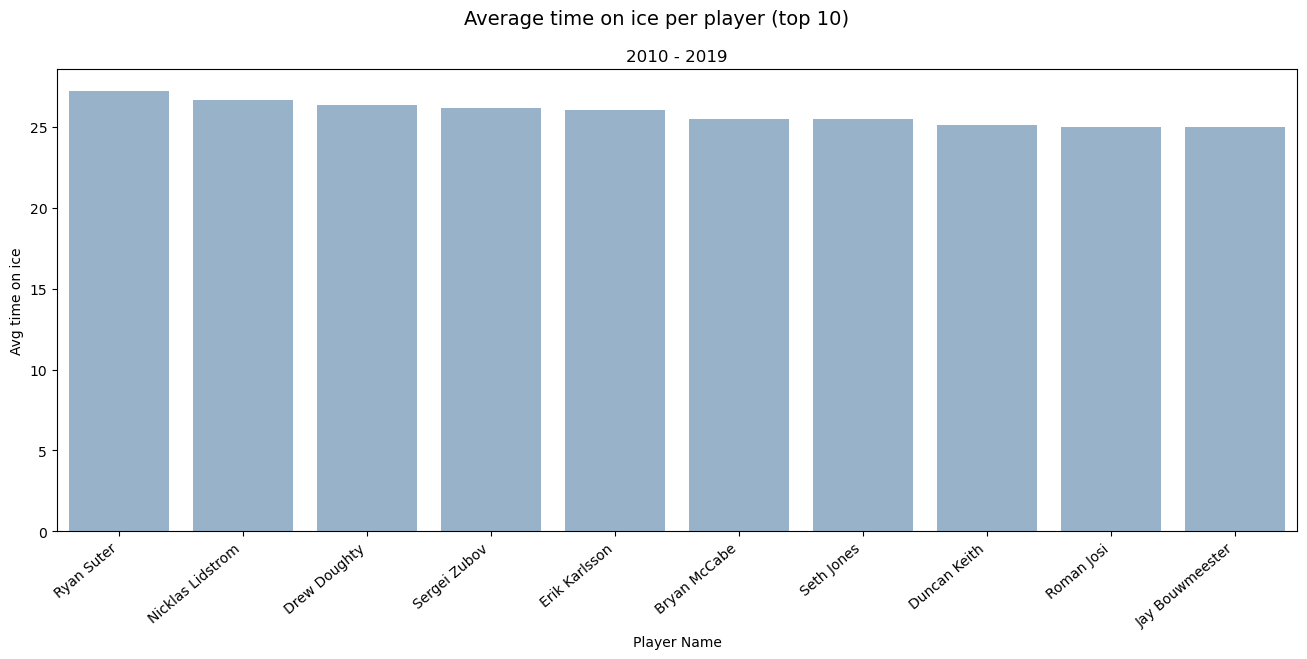

In [71]:
display_bar_plot(top_skaters, 'Avg Time On Ice', 'Player Name', 'Avg Time On Ice')
plt.xlabel('Player Name')
plt.ylabel('Avg time on ice')
plt.suptitle('Average time on ice per player (top 10)', fontsize=14)
plt.title('2010 - 2019', fontsize=12)
plt.show()

In [72]:
top_skaters.sort_values('Avg Time On Ice', ascending=False)\
    .head(10)[['Team Name','Player Name', 'Position', 'Total Games','Avg Time On Ice']]

,Team Name,Player Name,Position,Total Games,Avg Time On Ice
7521,Wild,Ryan Suter,D,796,27.20
6242,Red Wings,Nicklas Lidstrom,D,887,26.69
4064,Kings,Drew Doughty,D,1146,26.37
7114,Stars,Sergei Zubov,D,530,26.16
6578,Senators,Erik Karlsson,D,669,26.06
4511,Maple Leafs,Bryan McCabe,D,523,25.50
759,Blue Jackets,Seth Jones,D,507,25.48
332,Blackhawks,Duncan Keith,D,1385,25.12
5757,Predators,Roman Josi,D,868,25.01
5104,Panthers,Jay Bouwmeester,D,471,24.96


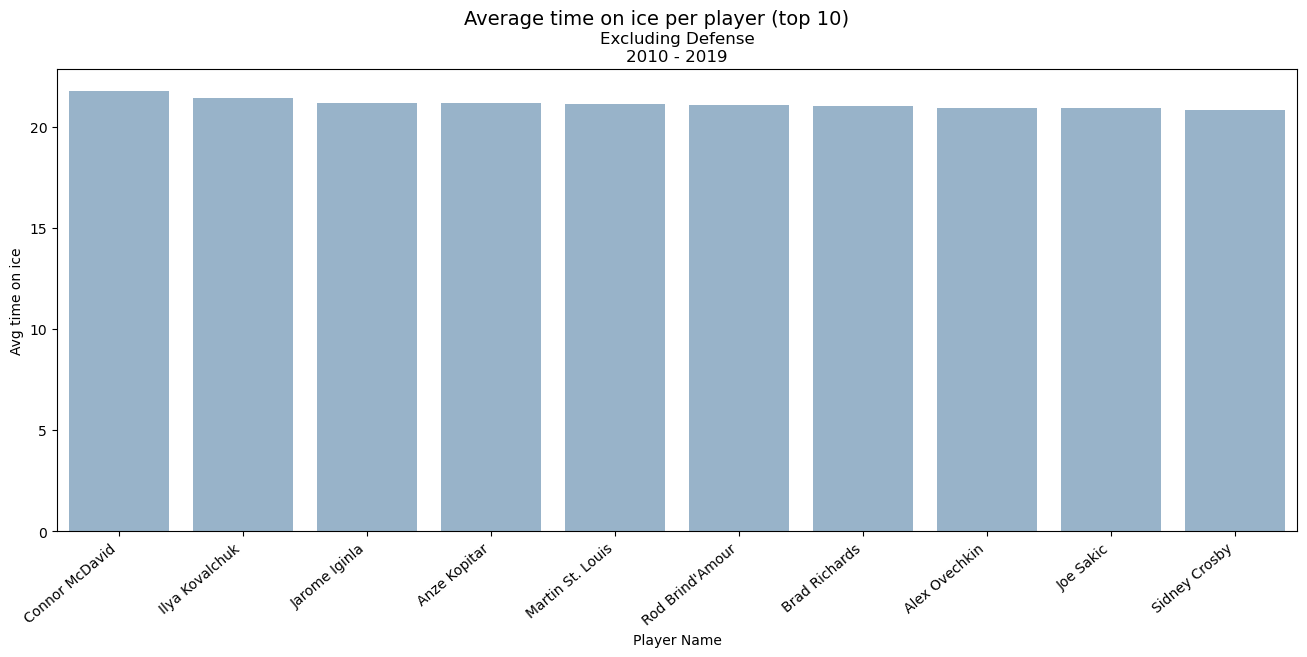

In [73]:
display_bar_plot(top_skaters[top_skaters['Position'] != 'D'], 'Avg Time On Ice', 'Player Name', 'Avg Time On Ice')
plt.xlabel('Player Name')
plt.ylabel('Avg time on ice')
plt.suptitle('Average time on ice per player (top 10)', fontsize=14)
plt.title('Excluding Defense\n2010 - 2019', fontsize=12)
plt.show()

In [74]:
top_skaters[top_skaters['Position'] != 'D'].sort_values('Avg Time On Ice', ascending=False)\
    .head(10)[['Team Name','Player Name', 'Position', 'Total Games','Avg Time On Ice']]

,Team Name,Player Name,Position,Total Games,Avg Time On Ice
4793,Oilers,Connor McDavid,C,513,21.75
7219,Thrashers,Ilya Kovalchuk,RW,593,21.41
2968,Flames,Jarome Iginla,RW,908,21.20
4020,Kings,Anze Kopitar,C,1297,21.16
4369,Lightning,Martin St. Louis,RW,990,21.11
3599,Hurricanes,Rod Brind'Amour,C,661,21.06
4257,Lightning,Brad Richards,C,552,21.03
1813,Capitals,Alex Ovechkin,LW,1424,20.93
114,Avalanche,Joe Sakic,C,526,20.92
5535,Penguins,Sidney Crosby,C,1217,20.83


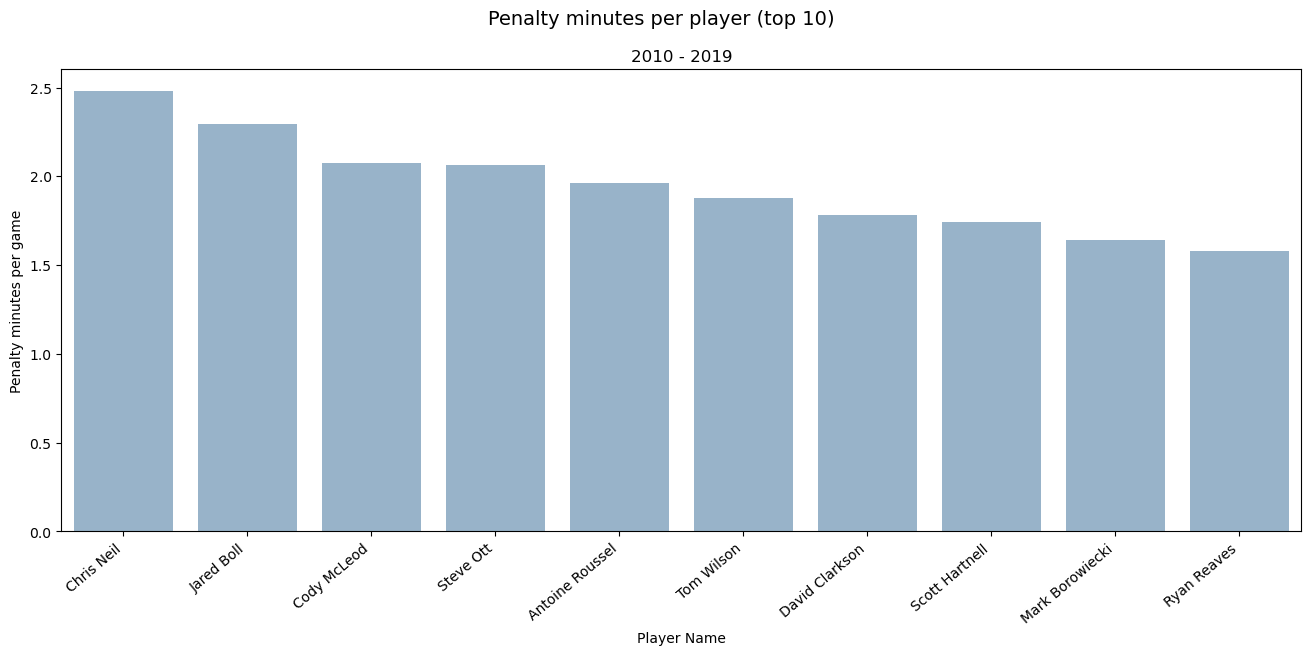

In [75]:
display_bar_plot(top_skaters, 'Penalty Minutes Per Game', 'Player Name', 'Penalty Minutes Per Game')
plt.xlabel('Player Name')
plt.ylabel('Penalty minutes per game')
plt.suptitle('Penalty minutes per player (top 10)', fontsize=14)
plt.title('2010 - 2019', fontsize=12)
plt.show()

In [76]:
top_skaters.sort_values('Penalty Minutes Per Game', ascending=False)\
    .head(10)[['Team Name','Player Name', 'Position', 'Total Games','Penalty Minutes Per Game']]

,Team Name,Player Name,Position,Total Games,Penalty Minutes Per Game
6534,Senators,Chris Neil,RW,1047,2.48
641,Blue Jackets,Jared Boll,RW,520,2.30
54,Avalanche,Cody McLeod,LW,666,2.07
7123,Stars,Steve Ott,C,566,2.07
6934,Stars,Antoine Roussel,LW,432,1.97
2026,Capitals,Tom Wilson,RW,745,1.88
2387,Devils,David Clarkson,RW,450,1.78
3337,Flyers,Scott Hartnell,LW,546,1.74
6631,Senators,Mark Borowiecki,D,489,1.64
968,Blues,Ryan Reaves,RW,455,1.58


### What are the league's best goalies?

In [77]:
# I drop all columns that I don't need in my analysis for now
top_goalies = goalie[['game_id','teamName','fullName','timeOnIce','savePercentage', 'shortHandedSaves']]\
    .groupby(['teamName','fullName'], as_index=False)\
    .agg({'game_id':'count', 'savePercentage':'mean', 'timeOnIce':'mean', 'shortHandedSaves':'mean'})

In [78]:
# Rename columns
top_goalies.columns = ['Team Name','Player Name','Total Games','Avg Save Percentage',
                       'Avg Time On Ice', 'Avg Short Handed Saves']

In [79]:
# Let's convert the time on ice from seconds to minutes
top_goalies['Avg Time On Ice'] = top_goalies['Avg Time On Ice'] / 60

In [80]:
top_goalies.head()

,Team Name,Player Name,Total Games,Avg Save Percentage,Avg Time On Ice,Avg Short Handed Saves
0,Avalanche,Adam Werner,4,86.11,43.92,2.00
1,Avalanche,Andrew Hammond,4,94.55,48.96,1.00
2,Avalanche,Andrew Raycroft,31,87.31,55.56,0.61
3,Avalanche,Antoine Bibeau,4,88.75,45.88,1.00
4,Avalanche,Brian Elliott,12,88.61,57.51,0.58


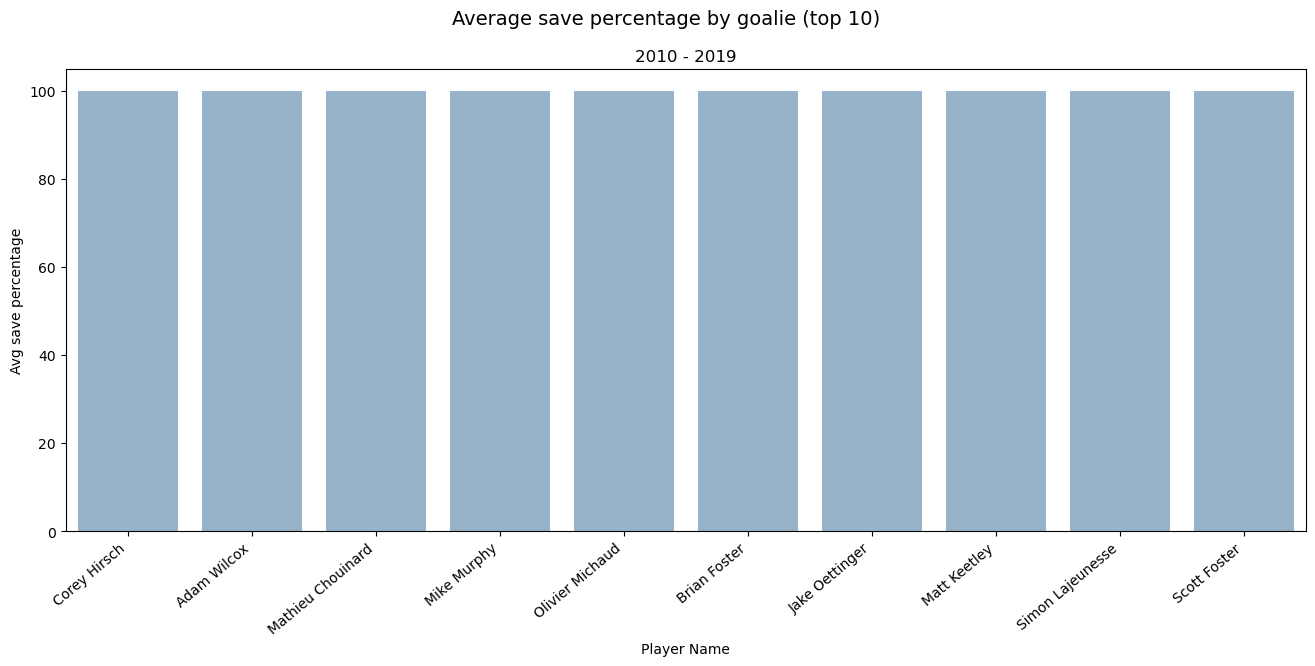

In [81]:
display_bar_plot(top_goalies, 'Avg Save Percentage', 'Player Name', 'Avg Save Percentage')
plt.xlabel('Player Name')
plt.ylabel('Avg save percentage')
plt.suptitle('Average save percentage by goalie (top 10)', fontsize=14)
plt.title('2010 - 2019', fontsize=12)
plt.show()

What happened here? None of this names resonate to the ones we are so used to see playing. As I stated earlier, these are all emergency goalies and played some minutes here and there. So I fix thsi adding a minimum of season as before:

In [82]:
top_goalies = top_goalies[top_goalies['Total Games'] > min_games]

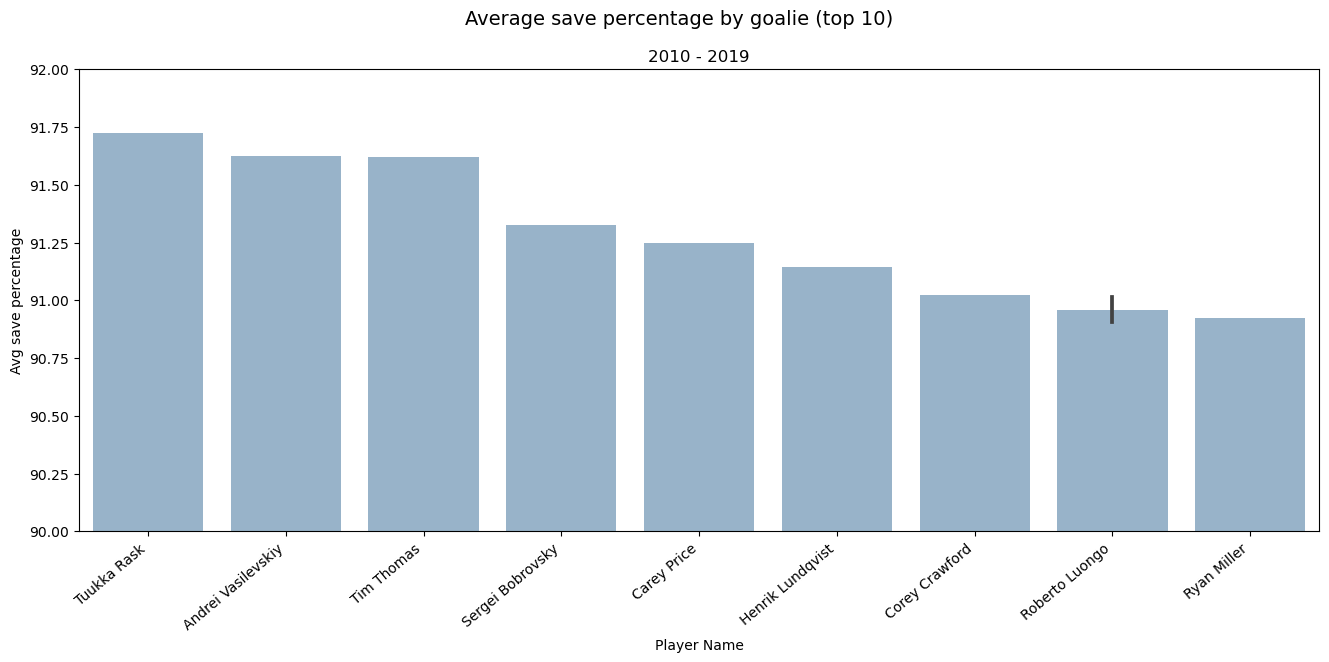

In [83]:
display_bar_plot(top_goalies, 'Avg Save Percentage', 'Player Name','Avg Save Percentage')
plt.xlabel('Player Name')
plt.ylabel('Avg save percentage')
plt.ylim([90, 92])
plt.suptitle('Average save percentage by goalie (top 10)', fontsize=14)
plt.title('2010 - 2019', fontsize=12)
plt.show()

It is very thaugh to be a goalie! Competence is huge! The variation between the first goalie (Tuukka Rask) and the second (Carey Price) is just 0.06%.

In [84]:
top_goalies.sort_values('Avg Save Percentage', ascending=False)\
    .head(10)[['Team Name','Player Name','Total Games','Avg Save Percentage']]

,Team Name,Player Name,Total Games,Avg Save Percentage
132,Bruins,Tuukka Rask,731,91.72
443,Lightning,Andrei Vasilevskiy,452,91.63
131,Bruins,Tim Thomas,410,91.62
74,Blue Jackets,Sergei Bobrovsky,473,91.33
138,Canadiens,Carey Price,866,91.25
610,Rangers,Henrik Lundqvist,1070,91.15
34,Blackhawks,Corey Crawford,670,91.02
179,Canucks,Roberto Luongo,478,91.01
667,Sabres,Ryan Miller,547,90.92
552,Panthers,Roberto Luongo,621,90.91


Let's look what goalie played the most number of games in average.

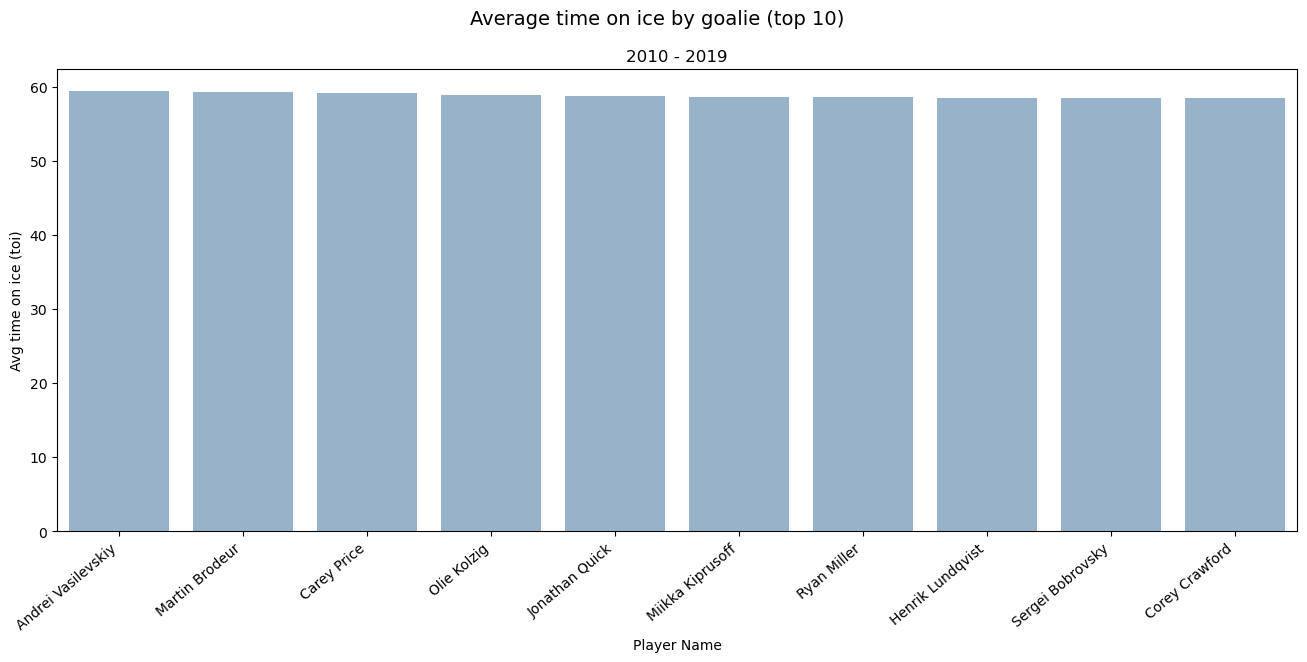

In [85]:
display_bar_plot(top_goalies, 'Avg Time On Ice', 'Player Name', 'Avg Time On Ice')
plt.xlabel('Player Name')
plt.ylabel('Avg time on ice (toi)')
plt.suptitle('Average time on ice by goalie (top 10)', fontsize=14)
plt.title('2010 - 2019', fontsize=12)
plt.show()

In [86]:
top_goalies.sort_values('Avg Time On Ice', ascending=False)\
    .head(10)[['Team Name','Player Name','Total Games','Avg Time On Ice']]

,Team Name,Player Name,Total Games,Avg Time On Ice
443,Lightning,Andrei Vasilevskiy,452,59.43
254,Devils,Martin Brodeur,836,59.35
138,Canadiens,Carey Price,866,59.19
196,Capitals,Olie Kolzig,439,58.97
430,Kings,Jonathan Quick,811,58.77
308,Flames,Miikka Kiprusoff,576,58.64
667,Sabres,Ryan Miller,547,58.63
610,Rangers,Henrik Lundqvist,1070,58.59
74,Blue Jackets,Sergei Bobrovsky,473,58.58
34,Blackhawks,Corey Crawford,670,58.50


And as we did with the players let's see the save percentage taking into account the number of minutes played:

In [87]:
# Let's see also how Avg Save Percentage relate to time on ice (toi)
top_goalies['Avg Save Percentage_by_toi'] = top_goalies['Avg Save Percentage'] / (top_goalies['Avg Time On Ice'])

# Now we look at the top 10 players
top_goalies.sort_values('Avg Save Percentage', ascending=False).head(10)

,Team Name,Player Name,Total Games,Avg Save Percentage,Avg Time On Ice,Avg Short Handed Saves,Avg Save Percentage_by_toi
132,Bruins,Tuukka Rask,731,91.72,58.26,0.80,1.57
443,Lightning,Andrei Vasilevskiy,452,91.63,59.43,0.84,1.54
131,Bruins,Tim Thomas,410,91.62,57.98,0.95,1.58
74,Blue Jackets,Sergei Bobrovsky,473,91.33,58.58,0.68,1.56
138,Canadiens,Carey Price,866,91.25,59.19,0.81,1.54
610,Rangers,Henrik Lundqvist,1070,91.15,58.59,0.79,1.56
34,Blackhawks,Corey Crawford,670,91.02,58.50,0.60,1.56
179,Canucks,Roberto Luongo,478,91.01,58.27,0.80,1.56
667,Sabres,Ryan Miller,547,90.92,58.63,1.00,1.55
552,Panthers,Roberto Luongo,621,90.91,56.68,0.85,1.60


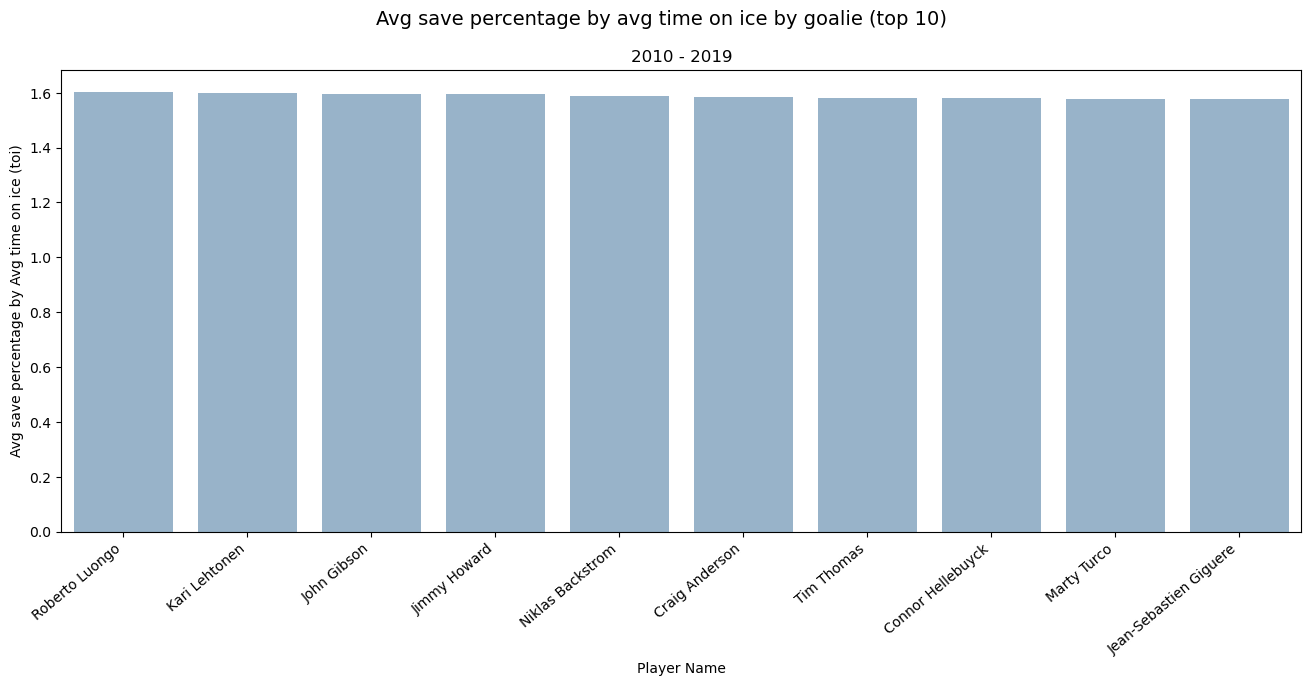

In [88]:
display_bar_plot(top_goalies, 'Avg Save Percentage_by_toi', 'Player Name', 'Avg Save Percentage_by_toi')
plt.xlabel('Player Name')
plt.ylabel('Avg save percentage by Avg time on ice (toi)')
plt.suptitle('Avg save percentage by avg time on ice by goalie (top 10)', fontsize=14)
plt.title('2010 - 2019', fontsize=12)
plt.show()

In [89]:
top_goalies.sort_values('Avg Save Percentage_by_toi', ascending=False)\
    .head(10)[['Team Name','Player Name','Total Games','Avg Save Percentage_by_toi']]

,Team Name,Player Name,Total Games,Avg Save Percentage_by_toi
552,Panthers,Roberto Luongo,621,1.60
728,Stars,Kari Lehtonen,462,1.60
274,Ducks,John Gibson,422,1.60
633,Red Wings,Jimmy Howard,661,1.59
769,Wild,Niklas Backstrom,409,1.59
675,Senators,Craig Anderson,559,1.58
131,Bruins,Tim Thomas,410,1.58
405,Jets,Connor Hellebuyck,427,1.58
730,Stars,Marty Turco,509,1.58
272,Ducks,Jean-Sebastien Giguere,446,1.58


## What are the teams that score more goals?

Let's calculate the top 3 scorers per team  in the league in the last decade.

In [90]:
skater_reindexed = top_skaters[['Total Goals', 'Team Name', 'Player Name']]\
                                .groupby(['Team Name', 'Player Name'])\
                                .agg({'Total Goals':'sum'})\
                                .sort_values(by=['Team Name', 'Total Goals'], ascending=[True, False])\
                                .reset_index(drop=False)

In [91]:
top_3_per_team = skater_reindexed.groupby(['Team Name']).head(3)

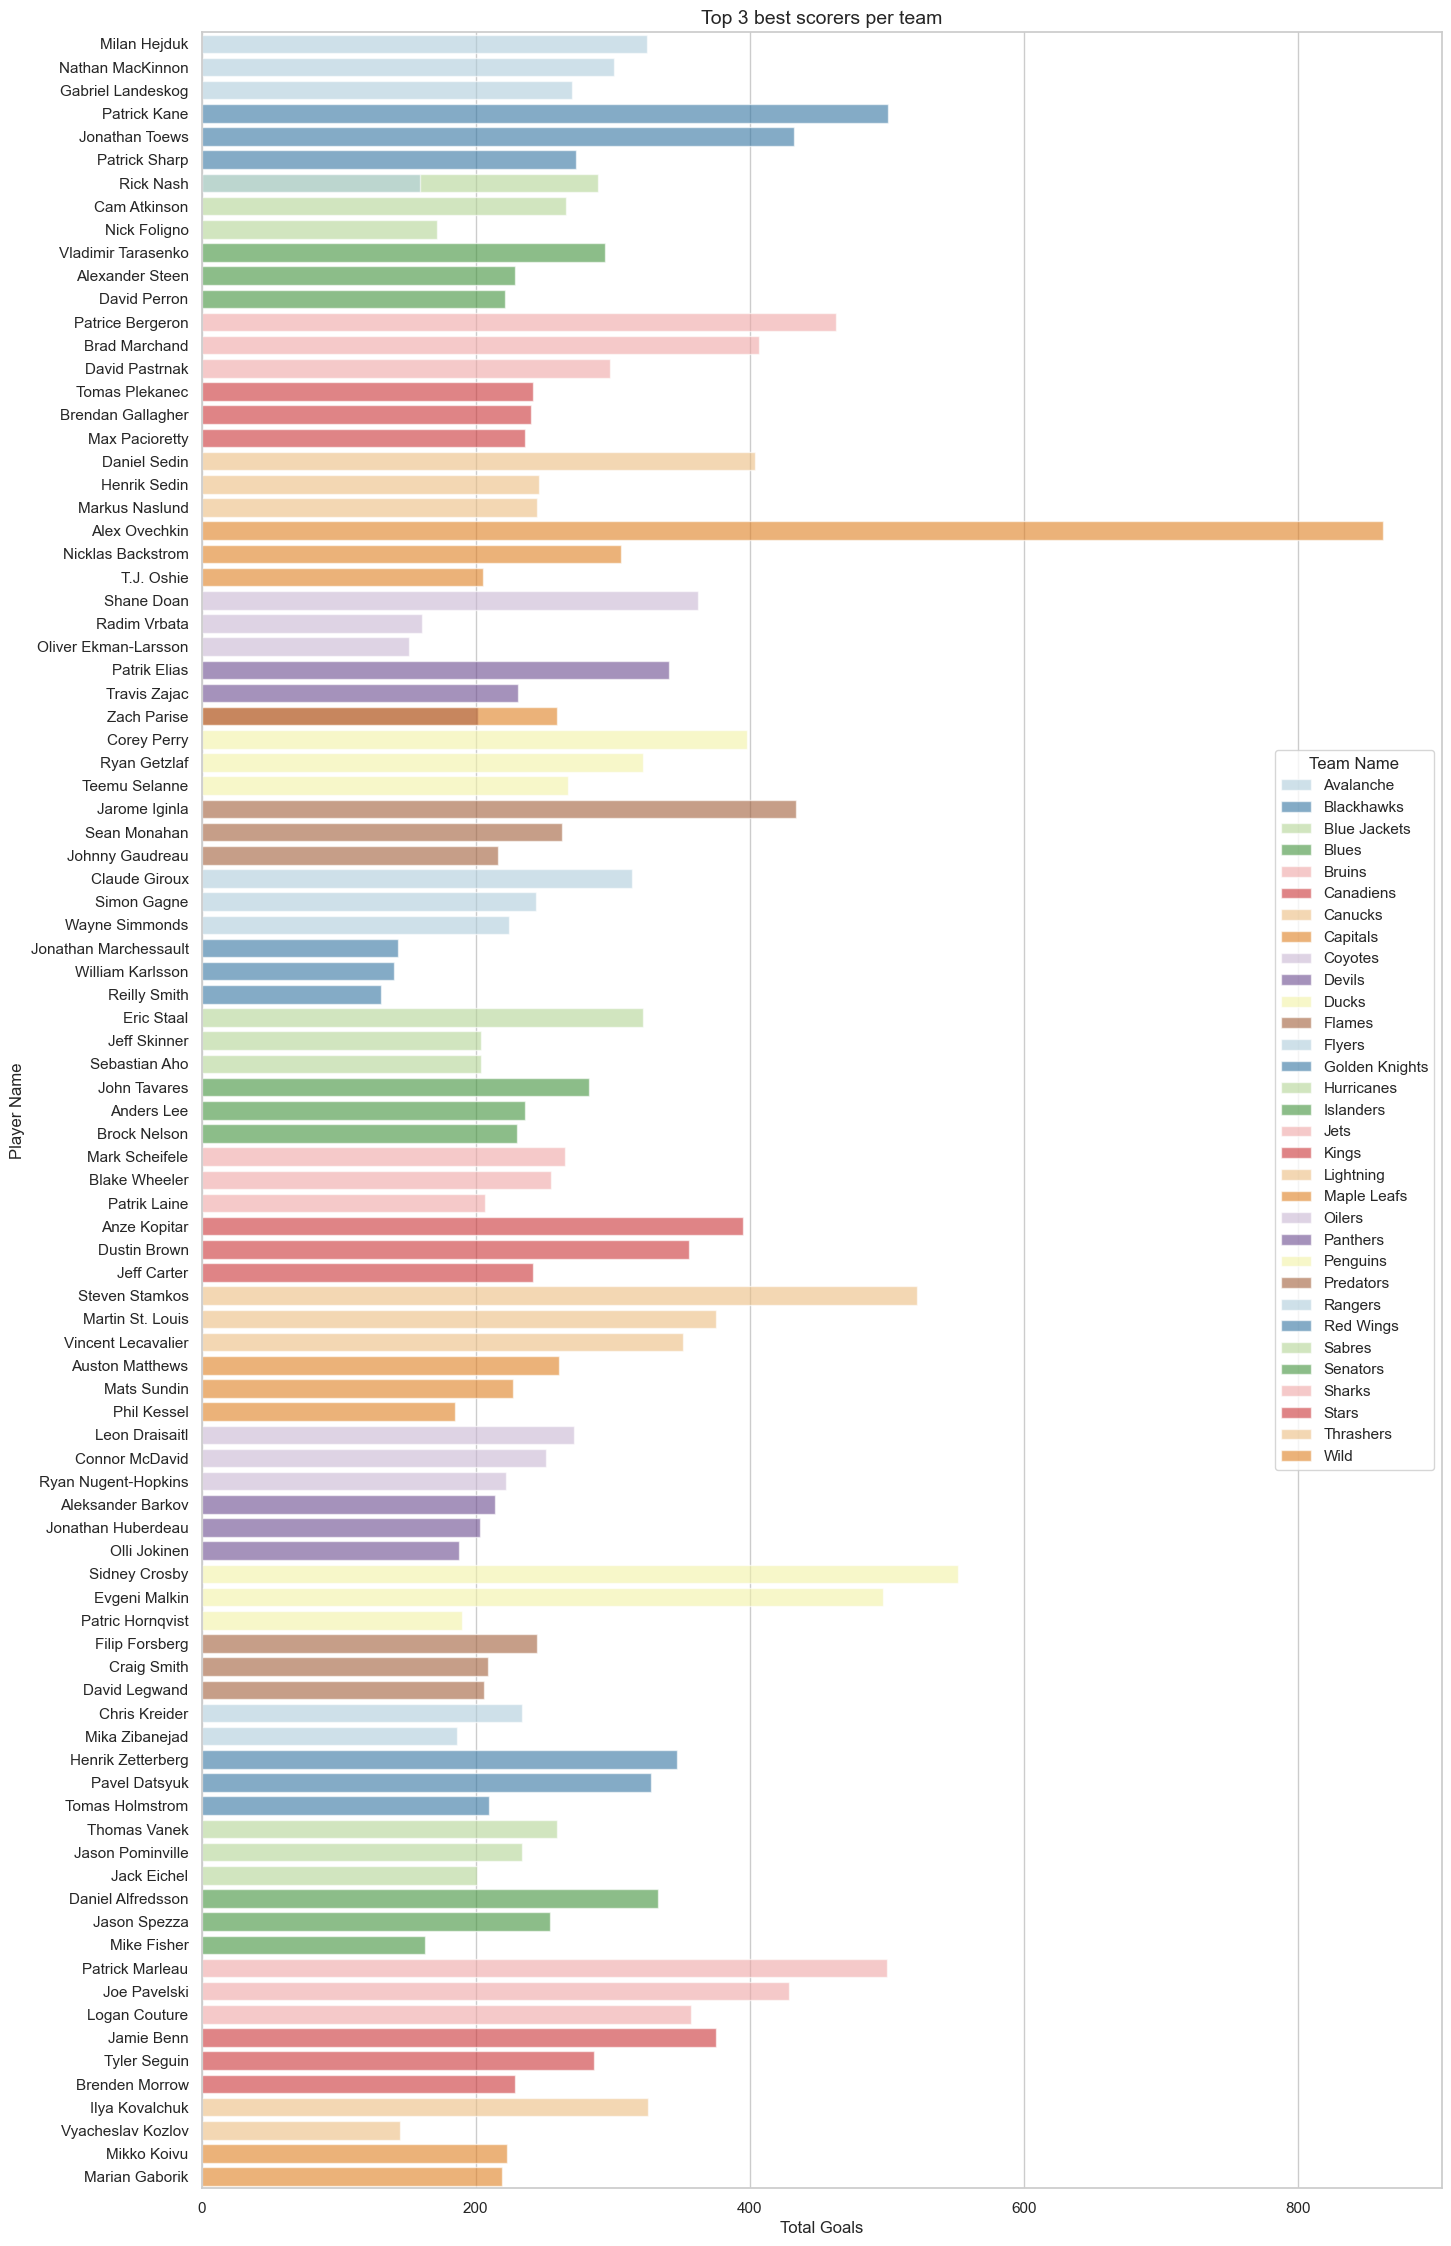

In [92]:
sns.set(rc={'figure.figsize':(16,28)})
display_hbar_plot(top_3_per_team, 'Total Goals', 'Player Name', 'Team Name', color=None, palette='Paired')
plt.title('Top 3 best scorers per team', fontsize=14)
plt.show()

Now let's average the top 3 scorers per team to see which one is the most dangerous team in the league in the last decade

In [93]:
average_top_3_team = top_3_per_team.groupby(['Team Name']).mean()\
                                    .reset_index(drop=False)\
                                    .sort_values(by=['Total Goals'], ascending=[False])

/var/folders/0z/70q5kf290v19vx5nm0hhwrc00000gp/T/ipykernel_82330/880673228.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_top_3_team = top_3_per_team.groupby(['Team Name']).mean()\


In [94]:
average_top_3_team.head()

,Team Name,Total Goals
7,Capitals,457.67
28,Sharks,428.67
18,Lightning,416.00
22,Penguins,413.00
1,Blackhawks,402.00


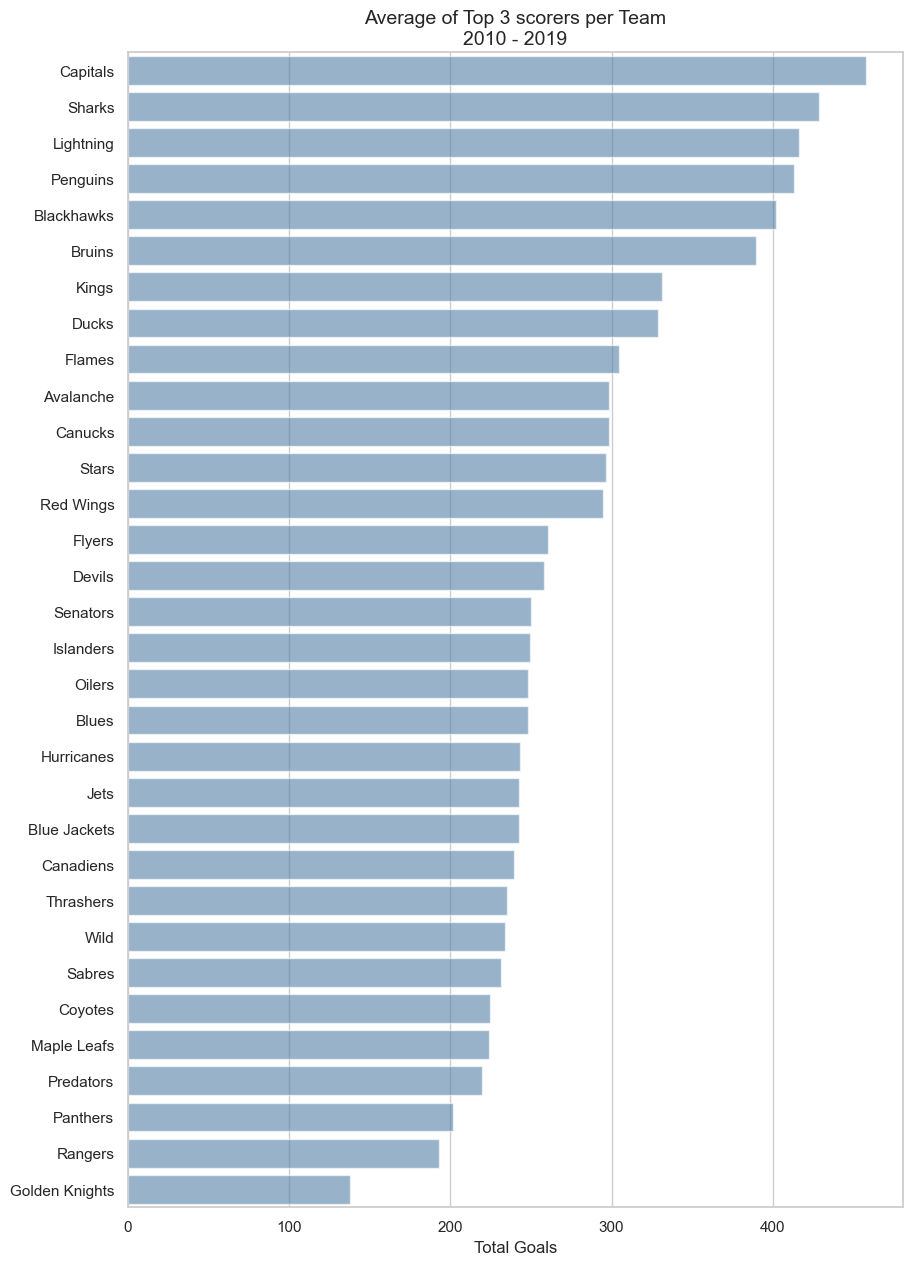

In [95]:
sns.set(rc={'figure.figsize':(10,15)})
display_hbar_plot(average_top_3_team, 'Total Goals', 'Team Name', None)
plt.title('Average of Top 3 scorers per Team\n2010 - 2019', fontsize=14)
plt.ylabel(None)
plt.xlabel('Total Goals')
plt.show()

Let's look at a similar metric but by Goals per Game and let's find out what is the team that stands out:

In [96]:
skater_per_team = top_skaters[['Team Name', 'Goals Per Game']]\
                            .groupby(['Team Name'])\
                            .agg({'Goals Per Game':'mean'})\
                            .sort_values(by=['Goals Per Game'], ascending=[False])\
                            .reset_index(drop=False).head(20)

In [97]:
skater_per_team

,Team Name,Goals Per Game
0,Thrashers,0.41
1,Maple Leafs,0.25
2,Flyers,0.24
3,Lightning,0.23
4,Golden Knights,0.23
5,Penguins,0.23
6,Flames,0.23
7,Avalanche,0.22
8,Blackhawks,0.22
9,Jets,0.21


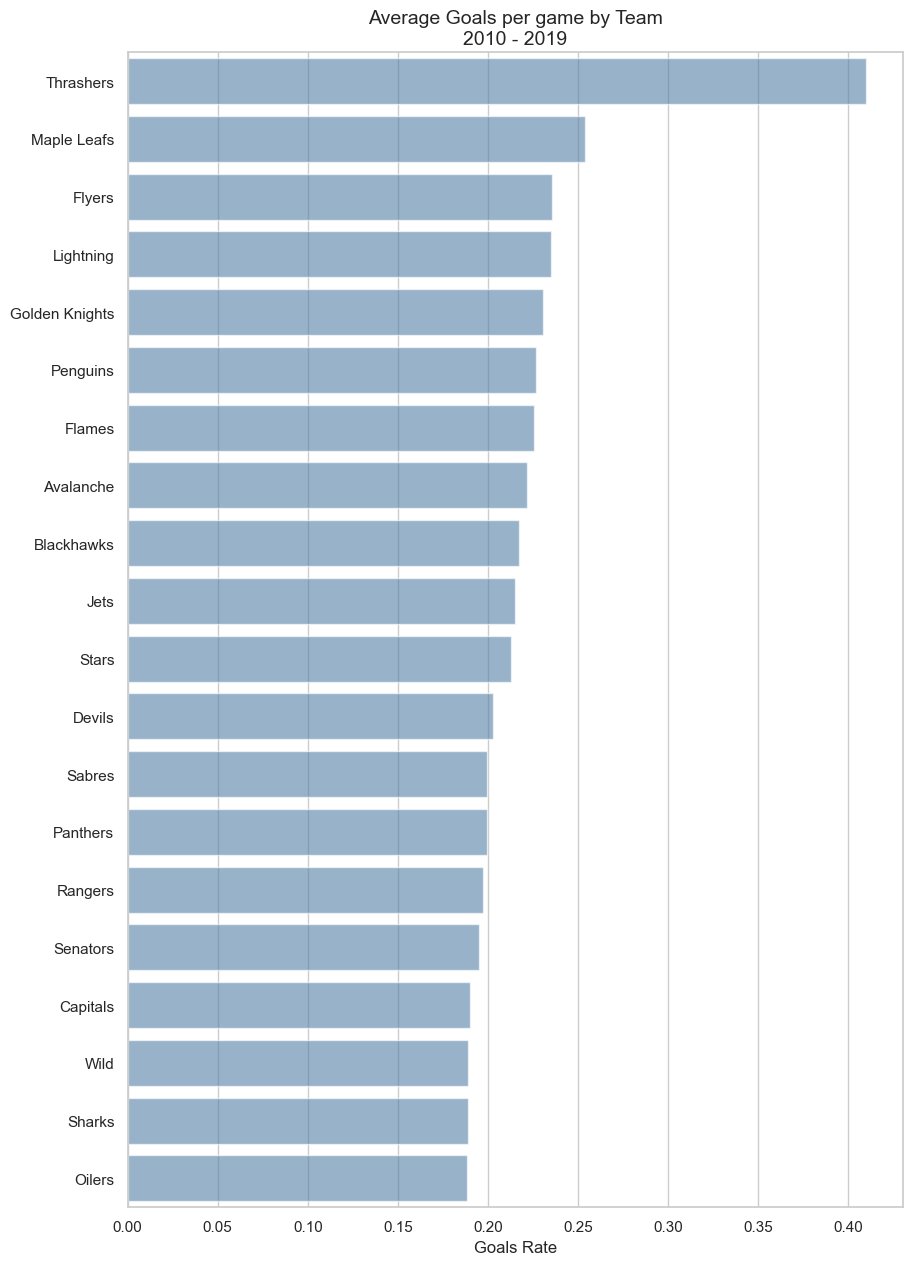

In [98]:
sns.set(rc={'figure.figsize':(10,15)})
display_hbar_plot(skater_per_team, 'Goals Per Game', 'Team Name', None)
plt.title('Average Goals per game by Team\n2010 - 2019', fontsize=14)
plt.ylabel(None)
plt.xlabel('Goals Rate')
plt.show()

### What is the most prolific country producing NHL players?

In [99]:
players_per_country = player_info['nationality'].value_counts().to_frame().reset_index(drop=False)

In [100]:
players_per_country.columns = ['Country', 'Number Players']

In [101]:
df = players_per_country.sort_values(by='Number Players', ascending=False)

In [102]:
df

,Country,Number Players
0,CAN,1894
1,USA,909
2,SWE,279
3,RUS,210
4,CZE,202
5,FIN,185
6,SVK,76
7,CHE,39
8,DEU,30
9,LVA,20


**Note** The code/graph bellow was extracted from [FC Python](https://fcpython.com/visualisation/python-treemaps-squarify-matplotlib).

I have not used this code and graph in my blog post as I did not clearly understood how to sort it properly and add text (number of players in each country category) hence I used Tableau instead which I know very well how to use it.

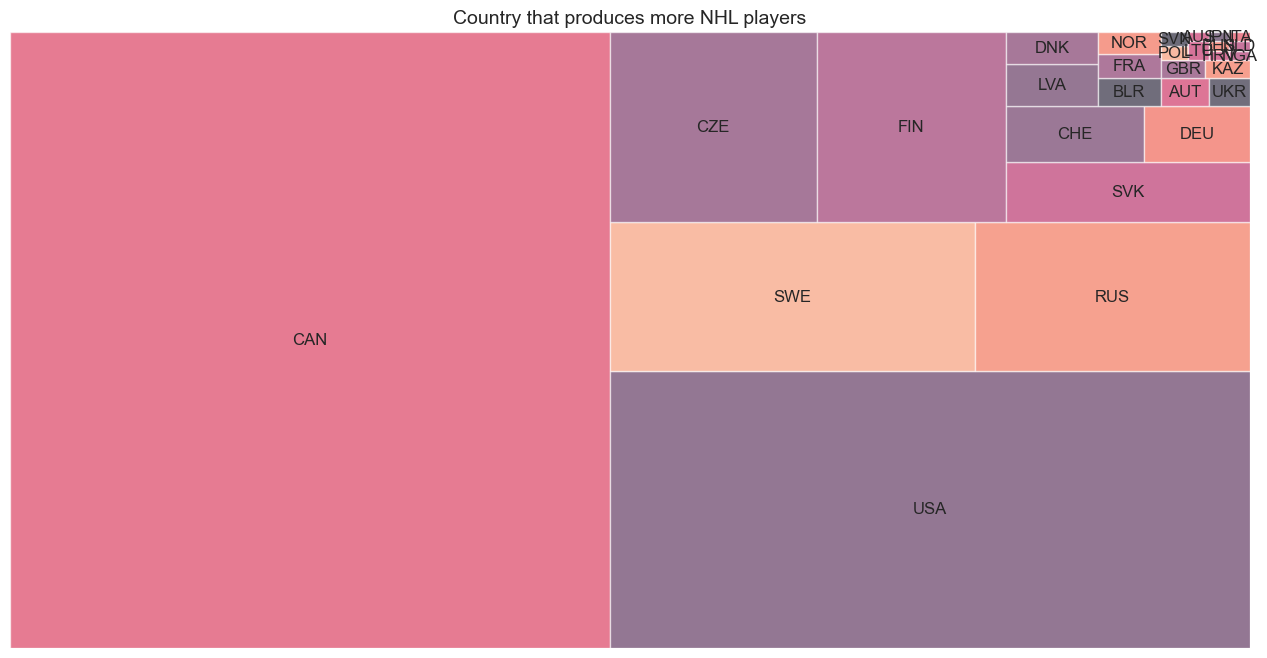

In [104]:
norm = matplotlib.colors.Normalize(vmin=min(players_per_country['Number Players']), vmax=max(players_per_country['Number Players']))
colors = [matplotlib.cm.Blues(norm(value)) for value in players_per_country['Number Players']]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 8)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=df['Country'].head(28), sizes=df['Number Players'], alpha=.6)
plt.title("Country that produces more NHL players", fontsize=14)

#Remove our axes and display the plot
plt.axis('off')
plt.show()

## Some plots I use to get an idea of the data

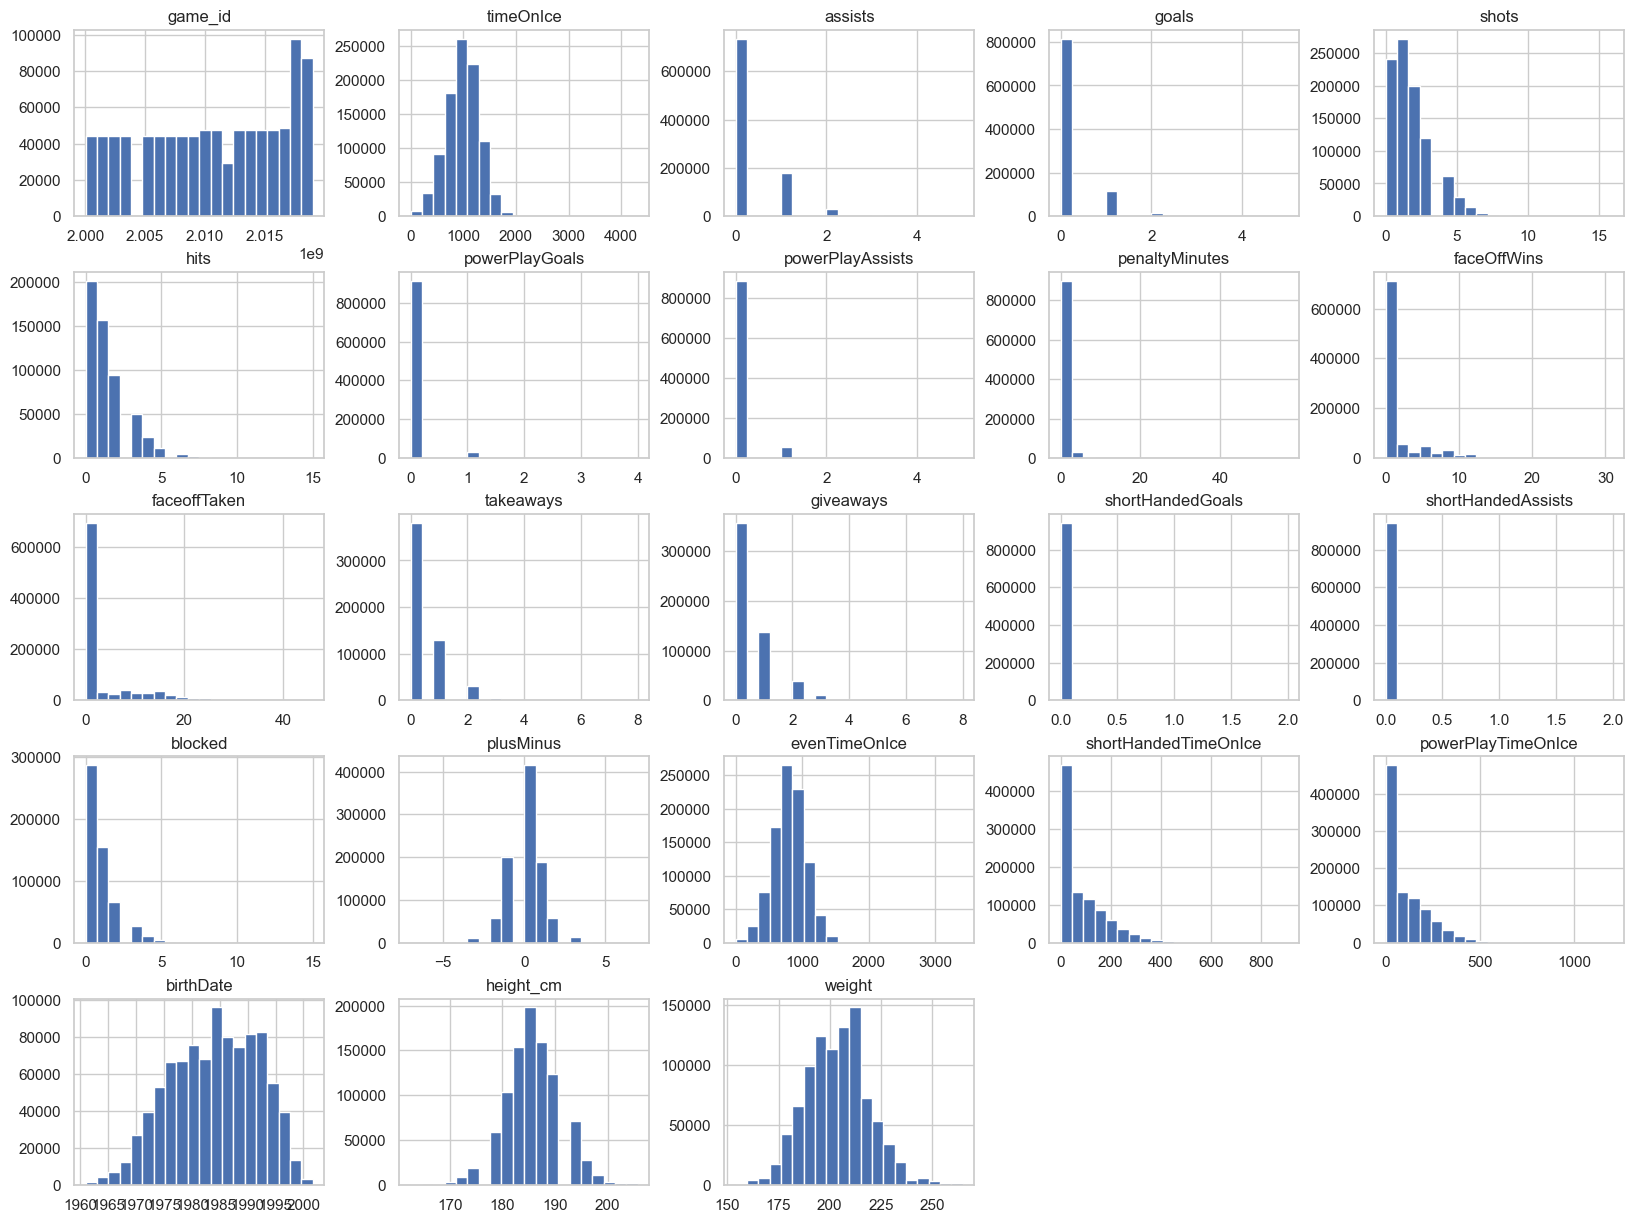

In [105]:
skater.hist(bins=20, figsize=(20, 15));